read data from file h6sd_monthly_mean_total_precip_3700-3799_multiyear_seasonal_mean_anomaly_mm_day.nc
created file h6sd_monthly_mean_total_precip_3700-3799_multiyear_seasonal_mean_anomaly_mm_day.png


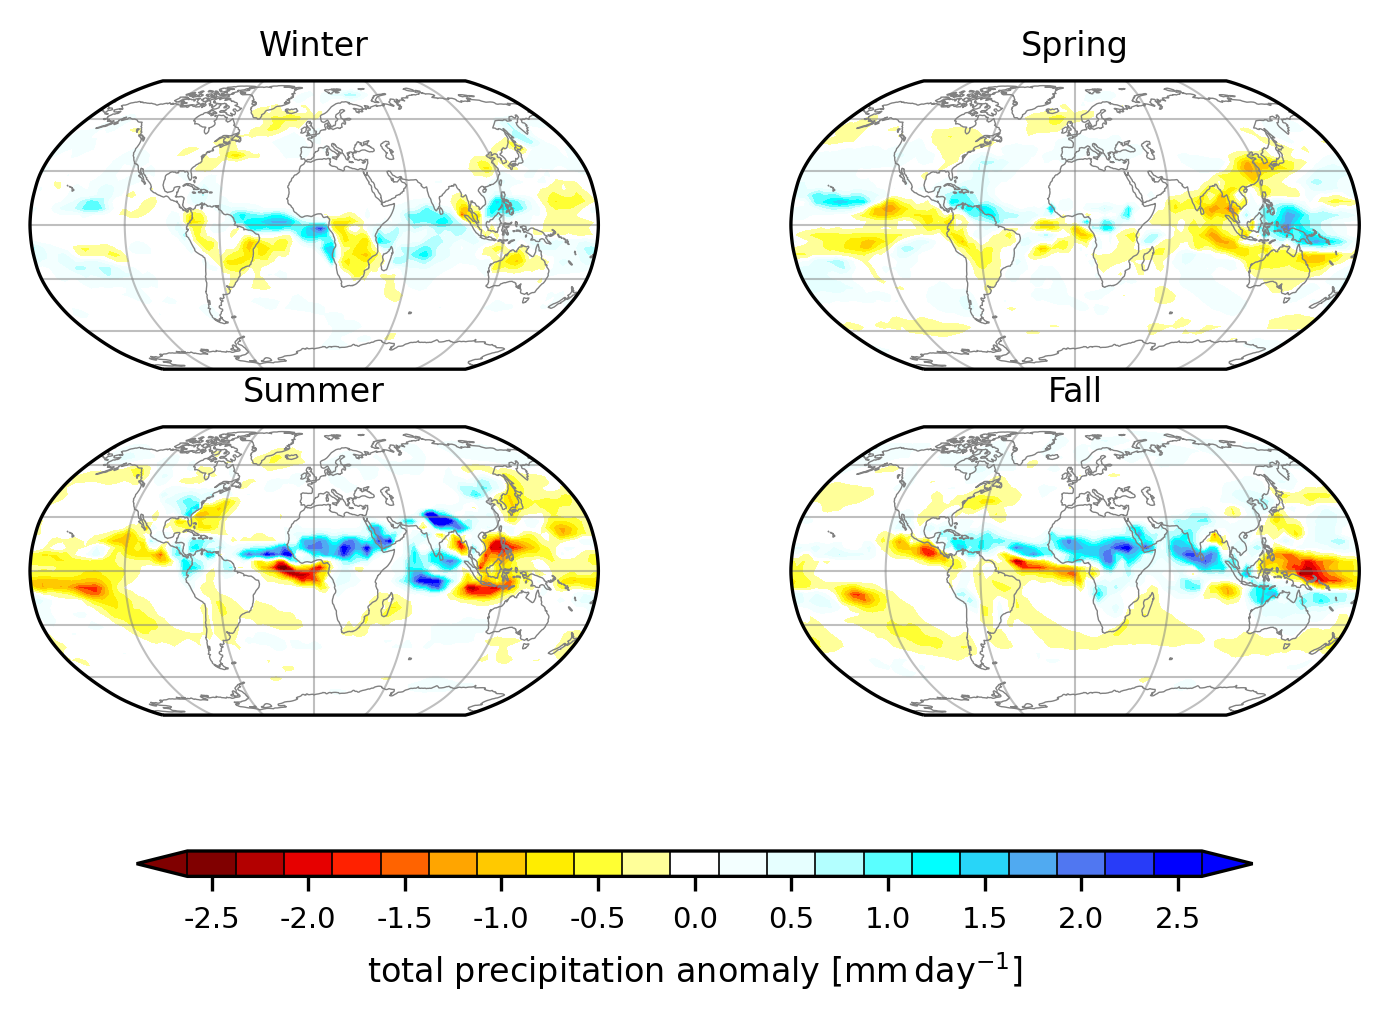

In [83]:
#!/usr/bin/python3
# %%import necessary packages

import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import matplotlib.colors as colors

# %%definition of parameter that controls plotting of the colorbar
plot_cbar=True

# %%definition of timmean climate data anomaly
anomaly_file="h6sd_monthly_mean_total_precip_3700-3799_multiyear_seasonal_mean_anomaly_mm_day.nc"

# %%definition of output file
output_file=anomaly_file.replace(".nc",".png")

# %%load data
dataset=Dataset(anomaly_file)
print("read data from file " + anomaly_file)
precip_anomaly=dataset.variables['precip'][:].squeeze()
model_lon=dataset.variables['lon'][:]
model_lat=dataset.variables['lat'][:]
precip_anomaly, model_lon=add_cyclic_point(precip_anomaly, coord=model_lon)
        
# %%create a figure with 4 subplots, that each show (Robinson-projection) coastlines
fig, axes = plt.subplots(2, 2, dpi=300, subplot_kw={"projection": ccrs.Robinson(central_longitude=0)})

# %%define color axis for the plot
level_min=-2.5
level_max=2.6
stepsize=0.25
levels=np.arange(level_min-stepsize/2,level_max+stepsize/2,stepsize)
color_list=['blue', 'cornflowerblue', 'aqua', 'lightcyan', 'white', 'yellow', 'orange', 'red', 'maroon']
color_list.reverse()
cmap=colors.LinearSegmentedColormap.from_list('mycmap', 
     color_list,(level_max-level_min)/stepsize+1) #+1 adds one level for the center
season = ['Winter','Spring','Summer','Fall']
aa = 0

for ax in axes.flat:
    ax.coastlines(linewidth=0.33,color='gray')
    ax.set_global()
    ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,linewidth=0.5, color='gray', alpha=0.5, linestyle='-')
        
    # %%plot the data anomaly as filled contours
    cf=ax.contourf(model_lon, model_lat, precip_anomaly[aa,:,:], transform=ccrs.PlateCarree(),
                   cmap=cmap, levels=levels, 
                   vmin=level_min-.05, vmax=level_max+.05,
                   extend='both')
    ax.set_title(season[aa],fontsize=8)
    aa += 1
    
#ax[0,0].coastlines(linewidth=0.33,color='gray')
#ax[0,0].set_global()
#ax[0,0].gridlines(crs=ccrs.PlateCarree(), draw_labels=False,linewidth=0.5, color='gray', alpha=0.5, linestyle='-')

# %%create the colorbar, pad=0.5 brings it closer to the map as the standard gap is a bit large
##if plot_cbar:
 ##   cax=fig.colorbar(cf, ticks=np.arange(level_min,level_max+.1,stepsize*2), drawedges=True, orientation='horizontal',
   ##            label=r"total precipitation anomaly [mm$\,$day$^{-1}$]",pad=0.05,shrink=1.25,aspect=40)
   ## cax.ax.xaxis.set_ticklabels([label.get_text().replace("−", "-") for label in cax.ax.xaxis.get_ticklabels()])
   ## cax.ax.tick_params(labelsize=9)
        
# %%export the figure to PNG
##if not plot_cbar:
  ##  output_file=output_file.replace(".png","_no_cbar.png")

cbar = fig.colorbar(cf, ax=axes.ravel().tolist(), shrink=0.8,ticks=np.arange(level_min,level_max+.1,stepsize*2), 
                    drawedges=True, orientation='horizontal',
                    aspect=40)
cbar.ax.xaxis.set_ticklabels([label.get_text().replace("−", "-") for label in cax.ax.xaxis.get_ticklabels()])
cbar.ax.tick_params(labelsize=7)
cbar.set_label('total precipitation anomaly [mm$\,$day$^{-1}$]',fontsize=8)

plt.savefig(output_file,dpi=600,bbox_inches='tight')
print("created file " + output_file)
plt.show()
plt.close(fig)




In [21]:
precip_anomaly.shape

(4, 48, 97)

created file h6sd_monthly_mean_total_precip_3700-3799_multiyear_seasonal_mean_anomaly_mm_year.png


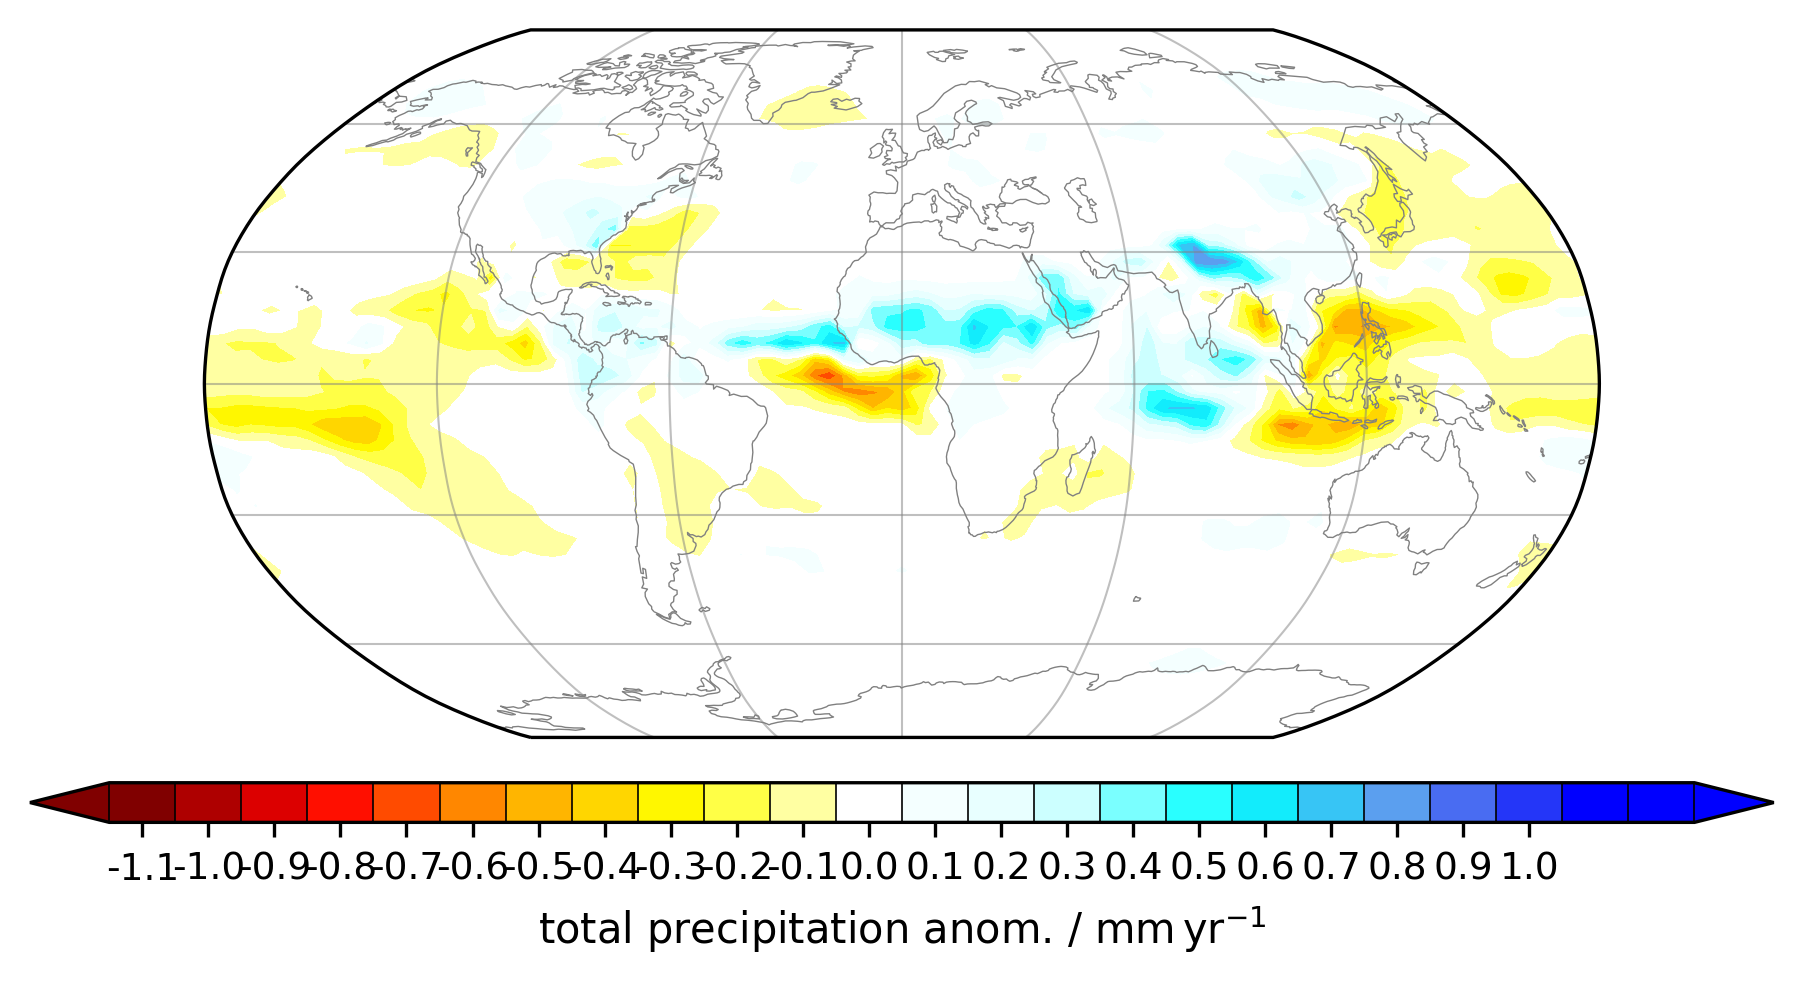

In [22]:
# %%create a figure (Robinson-projection) with coastlines
fig, ax = plt.subplots(1, 1, dpi=300, subplot_kw={"projection": ccrs.Robinson(central_longitude=0)})
ax.coastlines(linewidth=0.33,color='gray')
ax.set_global()
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=0.5, color='gray', alpha=0.5, linestyle='-')
        
# %%define color axis for the plot
level_min=-1.1
level_max=1.1
stepsize=0.1
levels=np.arange(level_min-stepsize/2,level_max+stepsize/2+stepsize,stepsize)
color_list=['blue', 'cornflowerblue', 'aqua', 'lightcyan', 'white', 'yellow', 'orange', 'red', 'maroon']
color_list.reverse()
cmap=colors.LinearSegmentedColormap.from_list('mycmap', 
     color_list,(level_max-level_min)/stepsize+1) #+1 adds one level for the center
        
# %%plot the data anomaly as filled contours
cf=ax.contourf(model_lon, model_lat,  precip_anomaly[2,:,:]/4, transform=ccrs.PlateCarree(),
       cmap=cmap, levels=levels, 
       vmin=level_min-.05, vmax=level_max+.05,
       extend='both')

# %%create the colorbar, pad=0.5 brings it closer to the map as the standard gap is a bit large
if plot_cbar:
    cax=plt.colorbar(cf, ticks=np.arange(level_min,level_max,stepsize), drawedges=True, orientation='horizontal',
               label=r"total precipitation anom. / mm$\,$yr$^{-1}$",pad=0.05,shrink=1.25,aspect=40)
    cax.ax.xaxis.set_ticklabels([label.get_text().replace("−", "-") for label in cax.ax.xaxis.get_ticklabels()])
    cax.ax.tick_params(labelsize=9)
        
# %%export the figure to PNG
if not plot_cbar:
    output_file=output_file.replace(".png","_no_cbar.png")
#plt.savefig(output_file,dpi=600,bbox_inches='tight')
print("created file " + output_file)
plt.show()
plt.close(fig)

